In [1]:
from tock import *

# Context-free grammars

To use a CFG, use the `from_grammar` function, which converts a CFG into a PDA:

In [2]:
m = from_grammar(["S -> a T b",
                  "S -> b",
                  "T -> T a",
                  "T -> &"])

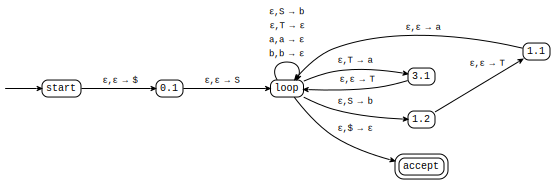

In [3]:
to_graph(m)

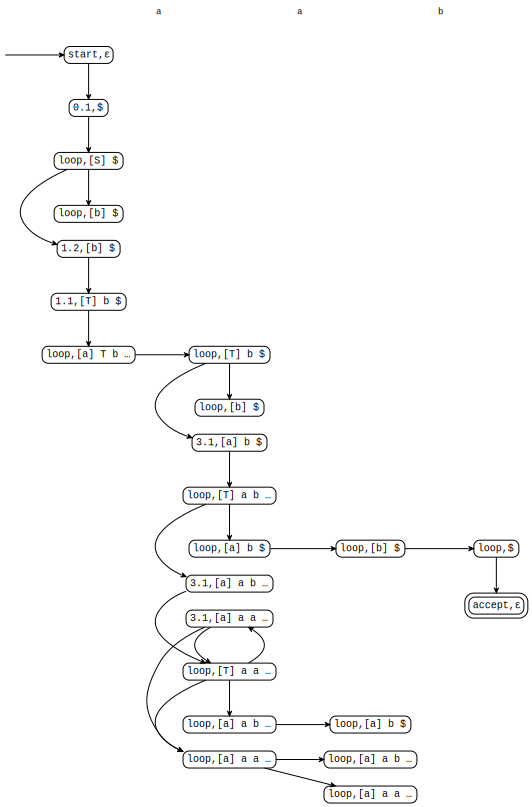

In [4]:
run(m, "a a b")

This diagram is a little hard to read, but one thing to note is the cycle between `loop` and `3.1`. This is caused by the left-recursive rule `T -> T a`, which the automaton applies an unbounded number of times.

The conversion in the reverse direction, from PDA to CFG, is actually related to the algorithm that Tock uses internally to simulate PDAs.

In [5]:
to_grammar(read_csv('../examples/sipser-2-14.csv'))